In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bitcoin_df = pd.read_csv('D:/DataScience/data/market-price.csv',
                         names = ['day', 'price'])

In [3]:
bitcoin_df.shape

(365, 2)

In [4]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
day      365 non-null object
price    365 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [6]:
# day 피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.head()

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000


In [7]:
# day 피처를 index로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

In [8]:
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


In [9]:
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


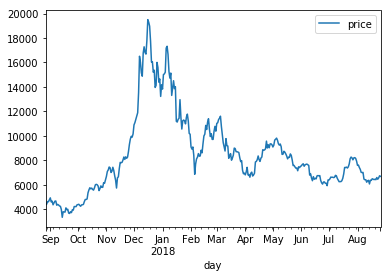

In [10]:
# 일자별 비트코인 시세를 시각화
bitcoin_df.plot()
plt.show()

### ARIMA 모델 학습

In [11]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# AR = 2(p), 차분(d) = 1(d), MA = 2(q)
model = ARIMA(bitcoin_df, order=(2, 1, 2))

# trand : constant를 가지고 있으면 c(constant) / nc(no constant)
# disp : 수렴정보를 나타냄
model_fit = model.fit(trend='c', disp=True, full_output=True)

# 학습내용 summary
model_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Wed, 12 May 2021   AIC                           5587.107
Time:                        10:03:08   BIC                           5610.490
Sample:                    08-28-2017   HQIC                          5596.400
                         - 08-26-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3432     27.794      0.228      0.819     -48.132      60.819
ar.L1.D.price    -0.3787      1.825     -0.207      0.836      -3.956       3.199
ar.L2.D.price     0.1586      1.190      0.133      0.894      -2.173       2.490
ma.L1.D.price     0.4568      1.821      0.251      0.802      -3.112       4.026
ma.L2.D.price    -0.1942      1.336     -0.145      0.884      -2.814       2.425
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5864           +0.0000j            1.5864            0.5000
AR.2            3.9738           +0.0000j            3.9738            0.0000
MA.1           -1.3797           +0.0000j            1.3797            0.5000
MA.2            3.7319           +0.0000j            3.7319            0.0000
-----------------------------------------------------------------------------
"""

### MA, D, AR 시계열의 중요한 파라미터의 값을 최적으로 설정
- Pmdarima 라이브러리
- SciPy >= 1.3.2
- Scikit-learn >= 0.22
- Pandas >= 0.19
- Statsmodels >= 0.11

### 라이브러리에 특정버전으로 업데이트 할 때
- pip install [package_name] == [package version]
- 일반적인 업데이트 pip install --upgrade [package_name]

In [12]:
from pmdarima.arima import auto_arima
model_arima=auto_arima(bitcoin_df,trace=True,error_action='ignore',
          start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True, stepwise=False,seasonal=False)

model_arima.fit(bitcoin_df)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5583.718, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5583.897, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5585.190, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5587.183, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5584.063, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5583.265, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5585.163, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5587.209, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5585.202, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5587.192, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5586.967, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5580.382, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5587.179, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5589.183, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5588.733, Time=0.57 sec

Best mode

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# AR = 2(p), 차분(d) = 1(d), MA = 2(q)
model = ARIMA(bitcoin_df, order=(2, 1, 3))

# trand : constant를 가지고 있으면 c(constant) / nc(no constant)
# disp : 수렴정보를 나타냄
model_fit = model.fit(trend='c', disp=True, full_output=True)

# 학습내용 summary
model_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  364
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2787.305
Method:                       css-mle   S.D. of innovations            512.060
Date:                Wed, 12 May 2021   AIC                           5588.611
Time:                        10:03:22   BIC                           5615.891
Sample:                    08-28-2017   HQIC                          5599.453
                         - 08-26-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3835     31.976      0.200      0.842     -56.289      69.056
ar.L1.D.price     0.2971      0.249      1.192      0.233      -0.191       0.786
ar.L2.D.price     0.5324      0.213      2.504      0.012       0.116       0.949
ma.L1.D.price    -0.2212      0.254     -0.869      0.385      -0.720       0.277
ma.L2.D.price    -0.6111      0.196     -3.123      0.002      -0.995      -0.228
ma.L3.D.price     0.0363      0.066      0.549      0.583      -0.093       0.166
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1196           +0.0000j            1.1196            0.0000
AR.2           -1.6776           +0.0000j            1.6776            0.5000
MA.1            1.1450           +0.0000j            1.1450            0.0000
MA.2           -1.4072           +0.0000j            1.4072            0.5000
MA.3           17.0988           +0.0000j           17.0988            0.0000
-----------------------------------------------------------------------------
"""

### 모델의 성능 & 예측 결과 시각화
- 학습한 모델이 학습 데이터에 대해서 예측한 결과만 시각화

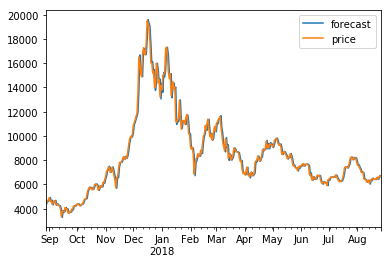

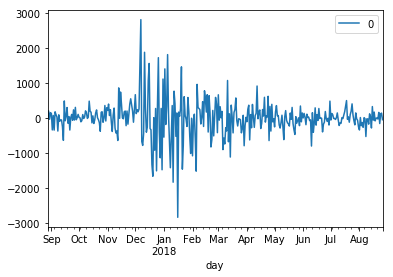

In [14]:
# plot_predict() : 학습 데이터만을 가지고 예측한 결과
fig = model_fit.plot_predict()
# 잔차의 변동을 시각화
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

### 모델 평가

In [15]:
# 학습 데이터셋으로부터 5일 뒤를 예측한다.
forecast_data = model_fit.forecast(steps=5)

# 테스트 데이터 로딩
bitcoin_test_df = pd.read_csv('D:/DataScience/data/market-price-test.csv',
                             names = ['ds', 'y'])

In [16]:
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [17]:
bitcoin_df.tail()

,price
day,
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714
2018-08-25,6719.429231
2018-08-26,6673.274167


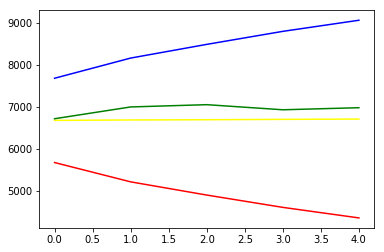

In [18]:
# 마지막 5일의 예측 데이터
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터
test_y = bitcoin_test_df.y.values

# 마지막 5일의 예측 데이터의 최소값
pred_y_lower = []

# 마지막 5일 예측 데이터의 최대값
pred_y_upper=[]

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
# 모델이 예상한 가격을 나타내는 그래프
plt.plot(pred_y, color = 'yellow')
#모델이 예상한 가격의 최소값을 나타내는 그래프
plt.plot(pred_y_lower, color='red')
# 모델이 예상한 가격의 최대값을 나타내는 그래프
plt.plot(pred_y_upper, color='blue')
# 실제 가격을 나타내는 그래프
plt.plot(test_y, color='green')

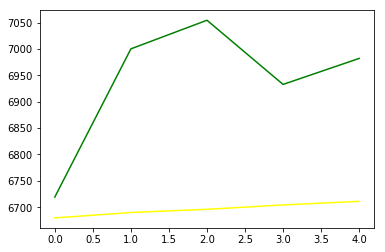

In [19]:
# 모델이 예상한 가격을 나타내는 그래프
plt.plot(pred_y, color = 'yellow')
# 실제 가격을 나타내는 그래프
plt.plot(test_y, color='green')

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# RMSE : 모델의 예측값과 실제값의 차이를 하나의 숫자로 표현
#rmse = mean_squared_error(test_y, pred_y) ** 0.5
rmse = sqrt(mean_squared_error(pred_y, test_y))
rmse

118.14587298999649

### prophet('예언자') 라이브러리를 활용한 시계열 분석
- 계절성을 고려, 추세, 불규칙변화....
- 피처의 이름을 ds, y
- seasonality_mode : 연간, 월간, 주간, 일간 등의 트렌드성을 반영
- changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영, 수치가 높을수록 모델은 과적합을 발생시킬 수 있다.

In [3]:
from fbprophet import Prophet

bitcoin_df = pd.read_csv('D:/DataScience/data/market-price.csv',
                        names = ['ds', 'y'])

prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

# 모델학습
prophet.fit(bitcoin_df)

In [6]:
# 5일을 내다보며 예측하는 작업
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6882.306915,6238.655680,7560.979054
366,2018-08-28,6976.002532,6291.380649,7623.220940
367,2018-08-29,6986.465207,6181.499304,7672.456460
368,2018-08-30,7055.474837,6282.526401,7784.378000
369,2018-08-31,7133.441748,6330.003505,7898.370165


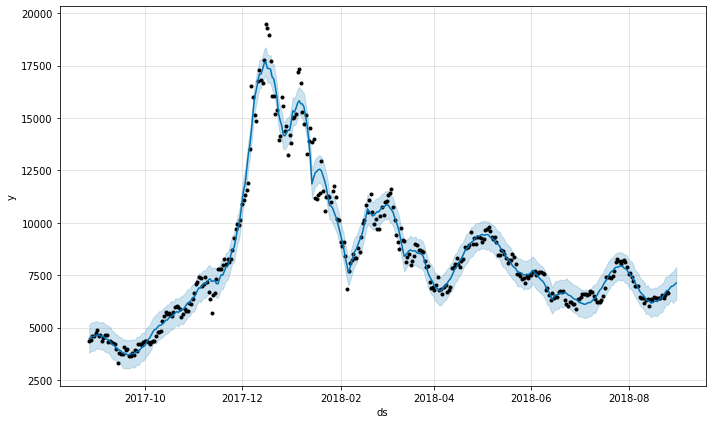

In [7]:
# 모델링을 통해 만들어진 forecast_data 시각화
fig1 = prophet.plot(forecast_data)

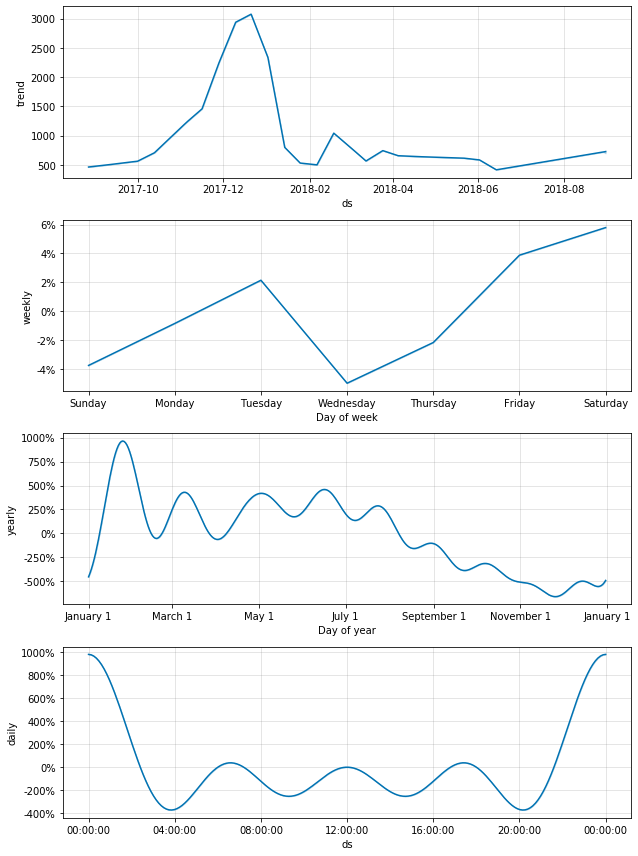

In [8]:
#  일간, 주간, 년간
fig2 = prophet.plot_components(forecast_data)

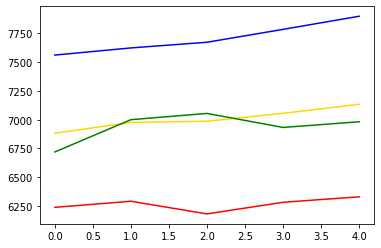

In [9]:
bitcoin_test_df = pd.read_csv('D:/DataScience/data/market-price-test.csv',
                        names = ['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color='gold')
plt.plot(pred_y_lower, color='red')
plt.plot(pred_y_upper, color='blue')
plt.plot(test_y, color='green')

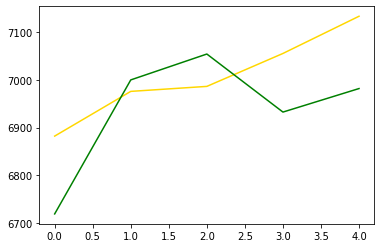

In [10]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

### 모델의 성능
- 실제 가격과 예측한 가격의 차이 : 처음 5일과 마지막 5을 계산에서 제외
- train RMSE 점수
- train r2 점수(train 데이터에 대한 모델의 설명력)

In [11]:
y = bitcoin_df.y.values[5:]
y_pred = forecast_data.yhat.values[5:-5]

In [13]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

519.4229203587639
0.9740657504711117
